In [2]:
import numpy as np
import matplotlib.pyplot as plt

f, Jansky = np.loadtxt('all_converted.txt', skiprows=1, usecols=(0,1), unpack =True)
plt.loglog(f[:25], Jansky[:25])
plt.xlabel('frequency')
plt.ylabel('Spectral Flux')
plt.show()

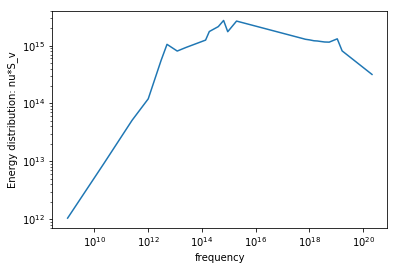

In [3]:
plt.loglog(f[:25], Jansky[:25]*f[:25])
plt.xlabel('frequency')
plt.ylabel('Energy distribution: nu*S_v')
plt.show()

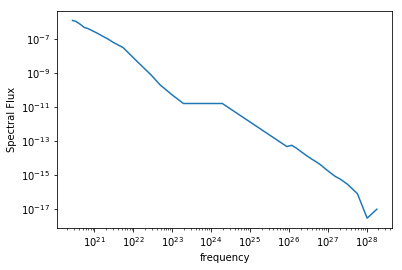

In [4]:
plt.loglog(f[25:], Jansky[25:])
plt.xlabel('frequency')
plt.ylabel('Spectral Flux')
plt.show()

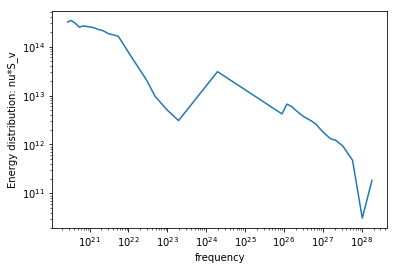

In [5]:
plt.loglog(f[25:], Jansky[25:]*f[25:])
plt.xlabel('frequency')
plt.ylabel('Energy distribution: nu*S_v')
plt.show()

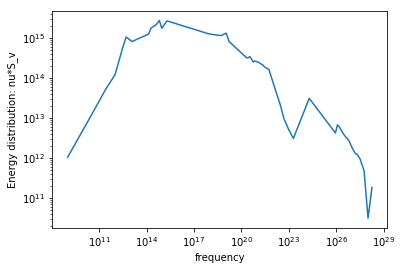

In [6]:
plt.loglog(f, Jansky*f)
plt.xlabel('frequency')
plt.ylabel('Energy distribution: nu*S_v')
plt.show()

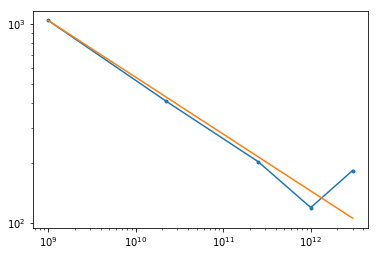

a =  0.284901647887


In [7]:
from scipy.optimize import curve_fit
def func(v,  a):
    return Jansky[0] * (v/f[0])**(-a)
popt, pcov = curve_fit(func, f[:5], Jansky[:5])
plt.loglog(f[:5], Jansky[:5], marker= '.')
plt.loglog(f[:5], func(f[:5], popt[0]))
plt.show()
print('a = ', *popt)

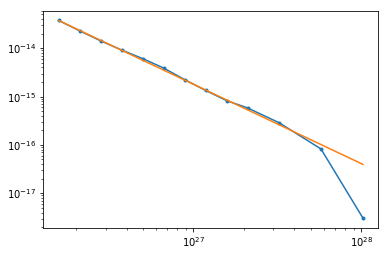

a =  1.64288081269


In [8]:
def func(v,  a):
    return Jansky[45] * (v/f[45])**(-a)
popt, pcov = curve_fit(func, f[45:58], Jansky[45:58])
plt.loglog(f[45:58], Jansky[45:58], marker= '.')
plt.loglog(f[45:58], func(f[45:58], popt[0]))
plt.show()
print('a = ', *popt)

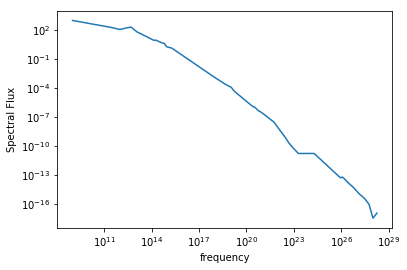

In [9]:
plt.loglog(f, Jansky)
plt.xlabel('frequency')
plt.ylabel('Spectral Flux')
plt.show()

In [31]:
from astropy import units as u
from astropy import constants as const

S = 0 
for i in range(0, len(f) - 1):
    S += (f[i] * u.Hz * Jansky[i] * u.Jy * (np.log10(f[i+1]) - np.log10(f[i])))

dist = 2000 # pc
# (S * u.Jy * 4 * np.pi * (dist * u.pc)**2 / const.L_sun).decompose()
S = (S * 4 * np.pi * (dist * u.pc)**2 / const.L_sun).decompose()

print("lumnosity of the Crab nebular is {}".format(S))

lumnosity of the Crab nebular is 16857.884830341303


In [199]:
def calc_g(nu_c, B_orth):
    return np.sqrt(nu_c / (0.29 * 42 * 1e9 * u.Hz /u.T * B_orth))

def calc_t(gamma_e):
    return (6 * mu_0 * m_e * c)/(4 * sig_T * B_orth**2 * gamma_e)
    

B_orth = 50 * 10**-9 * u.T
m_e = 9.11e-31 * u.kg
e = 1.602e-19 * u.C
sig_T = 6.65e-29 * (u.m)**2
c = const.c
mu_0 = const.mu0

DATA = [["radio", "opti", "X-ray", "gamma"], [7.5e-3*1e9 * u.Hz, 5.45e5*1e9 * u.Hz, 3e9*1e9 * u.Hz, 3e12*1e9 * u.Hz],[],[]]

print("Radiation:\t gamma_e:\t cooling time:")
print("________________________________________________")
for i in range(len(DATA[0])):
    gamma_e = calc_g(DATA[1][i], B_orth).decompose()
    DATA[2].append(gamma_e)
    t_cool = calc_t(gamma_e).decompose()
    DATA[3].append(t_cool)
    print(DATA[0][i],":\t\t", "{v:.3e}\t".format(v=DATA[2][i]), "{w:.3e}\t".format(w=DATA[3][i].to(u.s)))


Radiation:	 gamma_e:	 cooling time:
________________________________________________
radio :		 1.110e+02	 2.790e+13 s	
opti :		 9.460e+05	 3.273e+09 s	
X-ray :		 7.019e+07	 4.412e+07 s	
gamma :		 2.219e+09	 1.395e+06 s	
44119092.22012054 s


In [196]:
r = 15 * 1e3 * u.m
rho = 4 * 1e17 * (u.kg / (u.m)**3)
I = 0.4 * 4 * np.pi * r**3 * rho * r**2 /3
P = 33.3 * 1e-3 * u.s
P_dot = 4.22 * 1e-13

I = 0.4 * 1.6 * const.M_sun * r**2
E_rot = 0.5 * I * (2 * np.pi / P)**2
E_rot_dot = 0.5 * I * 4 * (np.pi)**2 * (-2 * P_dot) / (P**3)


E_rot_dot_sol = (E_rot_dot/const.L_sun).decompose()

print("E_rot: {v:.3e}".format(v=E_rot.to(u.J)))
print("E_rot_dot: {v:.3e}".format(v = E_rot_dot.to(u.W)))
print("E_rot_dot in solar_luminosity: {v:.3e}".format(v=E_rot_dot_sol))
print("delta_E: {v:.3e}".format(v=S+E_rot_dot_sol))

E_rot: 5.097e+42 J
E_rot_dot: -1.292e+32 W
E_rot_dot in solar_luminosity: -3.375e+05
delta_E: -3.206e+05
